## Monte Carlo simulation
Imagine you are asked to estimate the average distance between randomly placed points within a unit square (see figure below). Describe the python workflow that you would use to estimate the average distance between two randomly placed points within the unit square

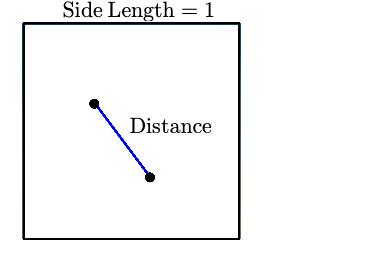

### 1) Construct the Unit Square Domain and populate with random particles:

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Number of particles
n = 60

# Randon number for the particle positions
numbers = np.random.rand(2*n)
#print(numbers)

# Define particle coordinates
particles = numbers.reshape(n,2)
#print(particles)

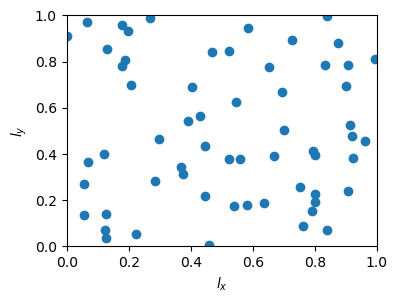

In [18]:
# Define the domain
plt.figure(figsize=(4,3))

plt.scatter(particles[:, 0],particles[:, 1])

plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.xlabel(r"$l_x$")
plt.ylabel(r"$l_y$")
plt.show()

### 2) Estimate distances (only for consecutive particles):

In [19]:
print(len(particles))

60


In [20]:
# Estimate distances
# We need a empty list
d_list = []

# For loop to compute distances between consecutuive particle 
for i in range(len(particles) - 1):
    #print(i)
    # Compute delta x
    d_x = particles[i+1][0] - particles[i][0]

    # Compute delta y
    d_y = particles[i+1][1] - particles[i][1]

    # Compute the Euclidean distances
    d_p = np.sqrt(d_x**2 + d_y**2)

    # Append distances to the list
    d_list.append(d_p)

# Convert to an array
d_array = np.array(d_list)
    

In [21]:
# Safe checks!
#print(d_array.shape)
#print(np.sqrt(2) - np.max(d_array))

### 3) Average distance considering particles at random positions

In [22]:
# Average the distances
d_av = np.mean(d_array)

print(d_av)

0.5533915023569337


### 4) Aggregate the results and study convergence

In [25]:
# Define a function to everything as above
def mean_distance(n, s):
    """
    This function is used to compute average distances between consecutive points
    in random positions (x_i, y_i).
    Inputs: n -> # of points
            s -> seed for random # generator
    Outputs: d_av  -> Mean distance 
    """ 
    # Fix the seed
    np.random.seed(s)
    
    # Randon number for the particle positions
    numbers = np.random.rand(2*n)
    #print(numbers)

    # Define particle coordinates
    particles = numbers.reshape(n,2)

    # Estimate distances
    # We need a empty list
    d_list = []
    
    # For loop to compute distances between consecutuive particle 
    for i in range(len(particles) - 1):
        #print(i)
        # Compute delta x
        d_x = particles[i+1][0] - particles[i][0]
    
        # Compute delta y
        d_y = particles[i+1][1] - particles[i][1]
    
        # Compute the Euclidean distances
        d_p = np.sqrt(d_x**2 + d_y**2)
    
        # Append distances to the list
        d_list.append(d_p)
        
    # Convert to an array
    d_array = np.array(d_list)

    # Average the distances
    d_av = np.mean(d_array)

    return d_av

In [29]:
# Test call
mean_distance(6, 345)

np.float64(0.4413843710203146)

In [42]:
# Run for different values of n
s_1  = 12345
s_2  = 572814

# Empty lists
n_list = []
d_av_list = []
d_av_list2 = []

# Index to fix the maximum number samples
k_max = 16

# For loop over n 
for i in range(1, k_max):
    
    # Dyadic n values
    n_list.append(2**i)

    # Get distances
    d_av_list.append(mean_distance(2**i, s_1))
    d_av_list2.append(mean_distance(2**i, s_2))

# Lists -> Arrays
n_list = np.array(n_list)
d_av_list= np.array(d_av_list)
d_av_list2= np.array(d_av_list2)

print(n_list)
print(d_av_list)
print(d_av_list2)

[    2     4     8    16    32    64   128   256   512  1024  2048  4096
  8192 16384 32768]
[0.75403388 0.5676234  0.5683322  0.53307082 0.53673429 0.52124766
 0.53119779 0.50852955 0.52422117 0.52151403 0.51720807 0.52577598
 0.52291948 0.52561647 0.52345633]
[0.355864   0.46152775 0.68672482 0.59130011 0.53509569 0.49301675
 0.52683107 0.54538144 0.53136374 0.51692762 0.52211666 0.5282258
 0.52169734 0.52205048 0.5223645 ]


### Convergence plot

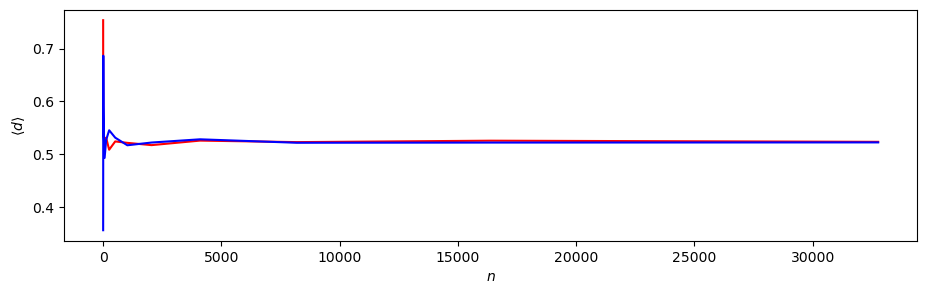

In [50]:
# Figure environment
plt.figure(figsize = (11, 3))

plt.plot(n_list, d_av_list, color = "red")
plt.plot(n_list, d_av_list2, color = "blue")

plt.xlabel(r"$n$")
plt.ylabel(r"$\langle d\rangle$")

plt.show()

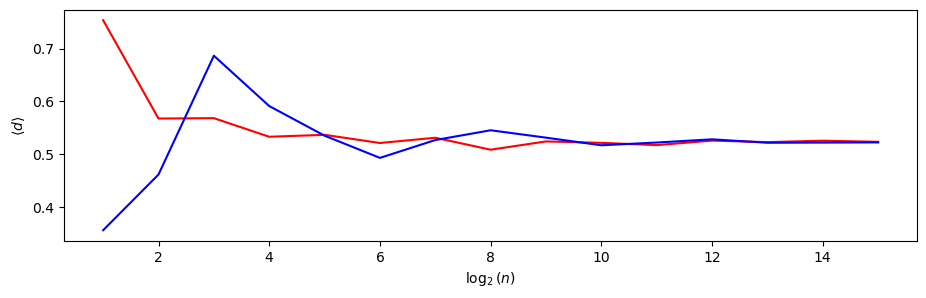

In [51]:
# Figure environment
plt.figure(figsize = (11, 3))

plt.plot(np.log2(n_list), d_av_list, color = "red")
plt.plot(np.log2(n_list), d_av_list2, color = "blue")

plt.xlabel(r"$\log_{2}(n)$")
plt.ylabel(r"$\langle d\rangle$")

plt.show()